In [1]:
import nibabel as nb
import numpy as np
import os

from rpy2.robjects import r
import rpy2.robjects as robj
from rpy2.robjects.numpy2ri import numpy2ri
from scipy.stats import gaussian_kde


In [2]:
datasets = list(('./data/BNU1', './data/BNU3', './data/HCP500', './data/Jung2015',
                 './data/KKI2009', './data/MRN114', './data/NKI1', './data/NKIENH',
                 './data/SWU4'))
# datasets = 'HCP500'#, 'Jung2015', 'MRN114', 'NKI1', 'NKIENH', 'SWU4'))
files = list()
for f in datasets:
    files.append([f + '/' + single for single in os.listdir(f)])
files

[['./data/BNU1/BNU1_0025864_1_DTI.bval',
  './data/BNU1/BNU1_0025864_1_DTI.bvec',
  './data/BNU1/BNU1_0025864_1_DTI.nii.gz'],
 ['./data/BNU3/BNU3_0027055_1_DTI.bval',
  './data/BNU3/BNU3_0027055_1_DTI.bvec',
  './data/BNU3/BNU3_0027055_1_DTI.nii.gz'],
 ['./data/HCP500/HCP500_140117_96LR_DTI.bval',
  './data/HCP500/HCP500_140117_96LR_DTI.bvec',
  './data/HCP500/HCP500_140117_96LR_DTI.nii.gz'],
 ['./data/Jung2015/Jung2015_M87100374_1_DTI.bval',
  './data/Jung2015/Jung2015_M87100374_1_DTI.bvec',
  './data/Jung2015/Jung2015_M87100374_1_DTI.nii.gz'],
 ['./data/KKI2009/KKI2009_113_1_DTI.bval',
  './data/KKI2009/KKI2009_113_1_DTI.bvec',
  './data/KKI2009/KKI2009_113_1_DTI.nii'],
 ['./data/MRN114/MRN114_M87102217_1_DTI.bval',
  './data/MRN114/MRN114_M87102217_1_DTI.bvec',
  './data/MRN114/MRN114_M87102217_1_DTI.nii'],
 ['./data/NKI1/NKI24_0021001_1_DTI.bval',
  './data/NKI1/NKI24_0021001_1_DTI.grad',
  './data/NKI1/NKI24_0021001_1_DTI.nii'],
 ['./data/NKIENH/NKIENH_0101084_1_DTI.bval',
  './da

In [5]:
# myl = r.list()
for idx, scan in enumerate(files):
    basename = os.path.basename(scan[0]).split('_')[0]
    outfile = basename+'med.gzip'
    print basename + "...",
    bval = np.loadtxt(scan[0])
    bval[np.where(bval==np.min(bval))] = 0
    print "loading data...",
    im = nb.load(scan[2])
    b0_loc = np.where(bval==0)[0][0]
    dti = im.get_data()[:,:,:,b0_loc]
    
#     ro = numpy2ri(np.ravel(dti+1))
    print "getting density...",
    density = gaussian_kde(np.ravel(dti+1))
    xs = np.linspace(0,2000,10)
    ro = numpy2ri(density(xs))
    print "converting to r...",
    xo = numpy2ri(xs)
    rr = robj.Matrix(ro)
    xx = robj.Matrix(xo)
    if idx is 0:
        myl = r.list(**{basename:rr})
        myx = r.list(**{basename:xx})
    else:
        myl = r.c(myl, r.list(**{basename:rr}))
        myx = r.c(myx, r.list(**{basename:xx}))
    print "done!"

r.assign('myl', myl)
r.assign('myx', myx)
# robj.DataFrame(rr)
r("save(myl, myx, file='"+"myout3.gzip"+"', compress=TRUE)")

BNU1... loading data... getting density... converting to r... done!
BNU3... loading data... getting density... converting to r... done!
HCP500... loading data... getting density... converting to r... done!
Jung2015... loading data... getting density... converting to r... done!
KKI2009... loading data... getting density... converting to r... done!
MRN114... loading data... getting density... converting to r... done!
NKI24... loading data... getting density... converting to r... done!
NKIENH... loading data... getting density... converting to r... done!
SWU4... loading data... getting density... converting to r... done!


rpy2.rinterface.NULL

0.509941550855


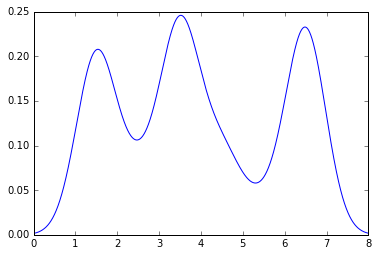

[ 0.00151687  0.00155688  0.00159783 ...,  0.00182604  0.00177924
  0.00173352]


In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
data = [1.5]*7 + [2.5]*2 + [3.5]*8 + [4.5]*3 + [5.5]*1 + [6.5]*8
density = gaussian_kde(data)
print density.covariance_factor()
xs = np.linspace(0,8,2000)
density.covariance_factor = lambda : .25
density._compute_covariance()
plt.plot(xs,density(xs))
plt.show()
print density(xs)

In [42]:
dti.dtype

dtype('<i2')

In [40]:
str(np.finfo(dti.dtype).max)

ValueError: data type <type 'numpy.int16'> not inexact

In [41]:
np.finfo(dti.dtype)

ValueError: data type <type 'numpy.int16'> not inexact

In [63]:
r.assign('myl', myl)
r.assign('myx', myx)
# robj.DataFrame(rr)
r("save(myl, myx, file='"+"myout2.gzip"+"', compress=TRUE)")

rpy2.rinterface.NULL

In [65]:
np.logspace(0,20000,10000)

array([  1.00230547e+10,   1.00276720e+12,   1.00322914e+14, ...,
                    inf,              inf,              inf])